## Lab: Cart Pole using OpenAI gym
## RL Basics and Simple Policy

### University of Virginia
### Reinforcement Learning
#### Last updated: January 18, 2024

---


### Name: Conor McLaughlin
 
### Computing ID: CFM5QC

#### Instructions:  

Carefully read the notes below and run the provided code. Answer each question clearly and show all results.

#### TOTAL POINTS: 10

---

### Agent and Environment

It is essential for the agent to have a way to get the next state and reward from the environment.

Sometimes it is possible for the agent to interact with environment in real life, but often this is expensive / dangerous / impossible.

We use models and simulators in this latter case.

For this reason, the Gym package is useful in RL

**Note**: Going forward, the fork [gymnasium](https://gymnasium.farama.org/) will maintain OpenAI gym.  
We will be using `gymnasium` but will still refer to the environment as `gym` when it doesn't cause confusion.

---

### Introduction to Gym

Gym is a toolkit for developing and comparing RL algorithms.

It comes with many pre-built environments which have functionality to emulate physical environments.

Users can build their own custom environments. See [here](https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e#:~:text=8%20min%20read-,Create%20custom%20gym%20environments%20from%20scratch%20%E2%80%94%20A%20stock%20market%20example,Atari%20games%20to%20experiment%20with.) for example.

---

### Cart Pole Problem

The **CartPole** problem has a small state space and action space, so it's popular for illustrating ideas.

Pole is attached to a cart on a frictionless track.

Pole starts upright

**Goal** is to keep pole from falling over

Control system by applying **force** -1 or +1 to cart.

**Reward** of +1 for each timestep the pole remains upright

**Episode** ends when pole is more than 12 degrees from vertical, or cart moves more than 2.4 units from center

CartPole-v1 defines *solving* as getting average reward of 195.0 over 100 consecutive trials.

<img src="./cartpole.png" alt="drawing" width="150"/>

---

### Setup and First Steps

This notebook can be easily run on [Google Colab](https://colab.research.google.com/)

In [1]:
! pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.4 MB/s eta 0:00:0000:0100:01


In [2]:
import gymnasium as gym
import random
import matplotlib.pyplot as plt

Load the environment

In [3]:
env = gym.make("CartPole-v1",render_mode="rgb_array")

state = env.reset(seed=314)
print(state)

(array([0.04225422, 0.02126478, 0.02520455, 0.00700802], dtype=float32), {})


Given the state, we take an action. The next state comes from the environment, which is encoded in `gym`.

The first element holds components:   
[0]: cart horizontal position (0.0 = center)  
[1]: velocity (positive means right)  
[2]: angle of the pole (0.0 = vertical)  
[3]: pole's angular velocity (positive means clockwise)

In [4]:
# state space number of components
env.observation_space.shape[0]

4

The action space consists of two options:

[0]: move cart left   
[1]: move cart right

In [5]:
env.action_space

Discrete(2)

Let's take an action, draw a sample and look at the results.

In [6]:
# move right
action = 1

# take a step and get next state, reward from environment
state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated

print('state', state)
print('reward', reward)
print('done', done)
print('info', info)

state [ 0.04267951  0.21601637  0.02534471 -0.27761722]
reward 1.0
done False
info {}


**Note about DONE**  
We need to understand if the episode is done after taking action  

The API now gives more detail on this variable, which may reach `done` state for two reasons:  
- **terminated**=True if environment terminates (eg. due to task completion, failure etc.)  
- **truncated**=True if episode truncates due to a time limit or a reason that is not defined as part of the task MDP.

**Run several steps by taking random actions**  

In [7]:
state = env.reset(seed=314)
for _ in range(5):
    print(env.step(env.action_space.sample())) # take a random action

(array([ 0.04267951, -0.1742094 ,  0.02534471,  0.30753553], dtype=float32), 1.0, False, False, {})
(array([ 0.03919533, -0.36968315,  0.03149542,  0.6081025 ], dtype=float32), 1.0, False, False, {})
(array([ 0.03180166, -0.17501536,  0.04365747,  0.32550377], dtype=float32), 1.0, False, False, {})
(array([ 0.02830135, -0.37073085,  0.05016755,  0.63162845], dtype=float32), 1.0, False, False, {})
(array([ 0.02088674, -0.5665155 ,  0.06280012,  0.9396791 ], dtype=float32), 1.0, False, False, {})


**Reward and Episode**  

For each time step that the cart keeps the pole balanced, it earns reward 1.

If the pole tilts too much or if the cart moves off screen, `reward=0` and `done=True` (the episode will end).

When the episode ends, a new episode may begin. The process learns cumulatively from each episode.

---

#### 1) Defining a function that runs a simple policy
**(POINTS: 1)**

When the pole leans left (negative angle), move left. When the pole leans right (positive angle), move right.  

The function should take the state and return an action. Test that it works properly.  

In [8]:
def simple_policy(state):
    if state[2] == 0.0:
        if random.random() < 0.5:
            return 0
        else:
            return 1
    elif state[2] > 0.0:
        return 1
    else:
        return 0

The below code tests the function. First it prints the initial state, then it prints the action and next state to show the progression, and confirm the function works properly.  

In [9]:
state1 = env.reset(seed=2173)[0]
print(state1)
for _ in range(10):
    action1 = simple_policy(state1)
    print(action1)
    state1, reward1, terminated1, truncated1, info1 = env.step(action1)
    print(state1)

[0.01914849 0.04664719 0.03920978 0.00585077]
1
[ 0.02008143  0.24118552  0.03932679 -0.2742077 ]
1
[ 0.02490514  0.4357249   0.03384263 -0.5542321 ]
1
[ 0.03361964  0.6303557   0.02275799 -0.8360633 ]
1
[ 0.04622675  0.82515955  0.00603673 -1.1215031 ]
1
[ 0.06272994  1.0202018  -0.01639334 -1.4122864 ]
0
[ 0.08313398  0.82528687 -0.04463906 -1.1247727 ]
0
[ 0.09963971  0.63077754 -0.06713451 -0.8464188 ]
0
[ 0.11225527  0.4366325  -0.08406289 -0.57558006]
0
[ 0.12098791  0.24278334 -0.09557449 -0.31051847]
0
[ 0.12584358  0.04914379 -0.10178486 -0.04944087]


#### 2) Simulating episodes with the simple policy  

2a) **(POINTS: 2)** Run 1000 episodes each with 100 time steps. Use the `simple_policy` for taking actions.  
Each time step will call the `step()` method to get the next state and reward. Produce a boxplot of the rewards from each episode.

In [10]:
rewards_list = []
for _ in range(1000):
    state = env.reset()[0]
    rewards = 0
    done = False
    for _ in range(100):
        action = simple_policy(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        rewards += reward
        if done:
            rewards_list.append(rewards)
            break

Text(0.5, 1.0, 'Simple Policy Rewards')

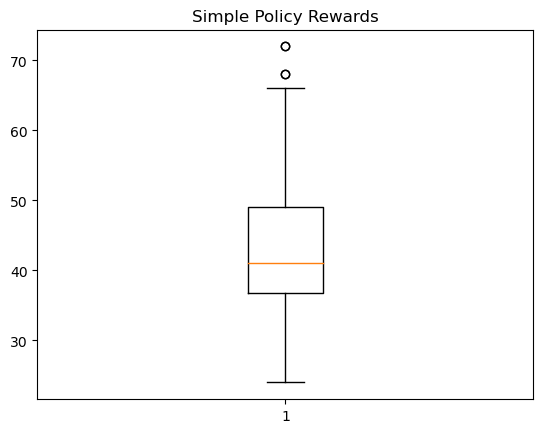

In [11]:
plt.boxplot(rewards_list)
plt.title('Simple Policy Rewards')

2b) **(POINTS: 1)** Is this policy able to solve the cart pole problem? Explain your answer.

This policy is not able to solve the cart pole problem because it did not average a reward of 195.0 over 100 consecutive trials.

#### 3) From Question [2], what is the mean and maximum reward (roughly)?
**(POINTS: 1)**

In [12]:
print(f"The mean reward is roughly {sum(rewards_list)/len(rewards_list)}")
print(f"The max reward is {max(rewards_list)}")

The mean reward is roughly 42.22
The max reward is 72.0


#### 4) Reversed Simple Policy
**(POINTS: 2)**

What happens if you reverse the simple policy, moving left when the pole leans right, and moving right when the pole leans left? This is not a good idea, but it's instructive. To show the result, produce the boxplot from before, and calculate the mean reward.

In [13]:
def rev_simple_policy(state):
    if state[2] == 0.0:
        if random.random() < 0.5:
            return 0
        else:
            return 1
    elif state[2] > 0.0:
        return 0
    else:
        return 1

In [14]:
rewards_list = []
for _ in range(1000):
    state = env.reset()[0]
    rewards = 0
    done = False
    state_list = []
    for _ in range(100):
        action = rev_simple_policy(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        rewards += reward
        if done:
            rewards_list.append(rewards)
            break

Text(0.5, 1.0, 'Reverse Simple Policy Rewards')

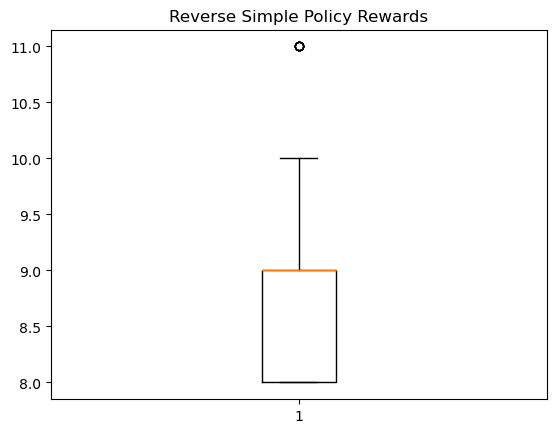

In [15]:
plt.boxplot(rewards_list)
plt.title('Reverse Simple Policy Rewards')

In [16]:
print(f"The mean reward for the reversed policy is roughly {sum(rewards_list)/len(rewards_list)}")

The mean reward for the reversed policy is roughly 8.764


#### 5) Modified Policy
**(POINTS: 2)** Full points for attempt and clear explanation.

Time to get creative! See if you can try a different policy that improves the mean reward. Clearly explain your strategy.

In [17]:
def modified_policy(state):
    if state[3] == 0.0:
        if random.random() < 0.5:
            return 0
        else:
            return 1
    elif state[3] > 0.0:
        return 1
    else:
        return 0

The above policy makes the determination of how to move the cart based on the pole's angular velocity. When the pole is moving counterclockwise (negative angular velocity), move left. When the pole is moving clockwise (positive angular velocity), move right. When the pole's velocity is 0 then it randomly decides to move right or left.

In [18]:
rewards_list = []
failure_states = []
for _ in range(1000):
    state = env.reset()[0]
    rewards = 0
    done = False
    for _ in range(300):
        action = modified_policy(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        rewards += reward
        if done or rewards == 300:
            rewards_list.append(rewards)
            failure_states.append(state)
            break

In [19]:
print(f"The mean reward for the modified policy is roughly {sum(rewards_list)/len(rewards_list)}")

The mean reward for the modified policy is roughly 197.359


---  

### Wrapup

This demo illustrated some basic ideas of reinforcement learning and got you started with OpenAI Gym.

We will revisit this example later, bringing in more tools for a better solution.

---


On my honor as a student, I have neither given nor received unauthorized aid on this assignment - Conor McLaughlin